# Week 10 - Unsupervised Learning

## Drill

__Exercise:__ Write a code that will find the sum of the square of first 50 natural numbers. 

In [1]:
# Solution
sum = 0
for i in range(50): 
    sum += i ** 2
print(sum)

40425


In [ ]:
# Your code below


__Exercise:__ Write a class `Clothes` for different types of clothes. A clothing should have the following attributes: 
* `type` - A string that describe what type of clothes is (e.g. t-shirt, socks) 
* `colour` - A string that describes the colour of the garment

Write the constructor for the class `Clothes` and also 
* getter methods 
* setter methods

In [ ]:
# Solution

class Clothes: 
    def __init__(self, c_type, colour): 
        self.type = c_type
        self.colour = colour 
        
    def get_type(self): 
        return type

In [ ]:
# Your code below


## What is Unsupervised Learning?

Last week we have looked into supervised learning, which is a type of machine learning where a target variable exists. This is very useful in prescribing practical solutions. There is another main category of machine learning, which is called unsupervised learning. Following the logic, it means there are no target variables to be deduced. Rather, unsupervised learning looked at the patterns within data. 

These are the main applications of unsupervised learning: 
* Dimensionality reduction
* Clustering
* Association rule learning

This week we are looking into dimension reduction and clustering only. As from last week, we know there are many different clustering and dimensionality reduction algorithms. We will look into [scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to see how they are different. 

## Dimensionality Reduction

Dimensionality reduction means to reduce the number of factors that describes the outcome. This will help to capture the so-called essense of the data, but in front end it will improve the machine learning results. It means the many dimensions data are mapped into the lower dimension object, while each new dimensions is a combination of all previous ones.  

In this week, we will use a synthetical wellbeing survey dataset. Let us import the data. 

In [1]:
import pandas as pd
df = pd.read_csv('files/wellbeing_ind.csv',index_col='ID')

Before we start, we should understand what is inside the dataset. 

In [2]:
df.head()

,Age,Location,Ethnic,Religion,Maternity,Working,Education Level,VALUE_FAMILY,VALUE_FRIENDS,VALUE_WORK,ECONOMIC_VALUE_VALUE_IND_EFFORT,ECONOMIC_VALUE_VALUE_PRIVATE_PUBLIC_ENTITIES,ECONOMIC_VALUE_VALUE_COMPETITION,SECURE,SECURE_JOB
ID,,,,,,,,,,,,,,,
9479,23,2004,No,Hinduism,Single,Yes,10.0,3.0,5.0,1.0,5.0,5.0,3.0,5,1.0
38929,24,2212,Middle East,Christian,Married,Yes,5.0,4.0,1.0,5.0,5.0,5.0,5.0,4,5.0
11746,25,2012,No,Catholic,Married,Yes,1.0,4.0,1.0,5.0,5.0,2.0,4.0,2,5.0
17334,20,2191,No,Catholic,Single,No,1.0,3.0,1.0,5.0,5.0,4.0,1.0,5,5.0
15328,30,2141,Asian,Christian,Single,Yes,10.0,4.0,1.0,1.0,5.0,5.0,3.0,3,1.0


You should also do further EDA on the dataset. What do you think are good ways to inspect the dataset?

The first few columns are from last week, and of course each rows represent the person that is from the census dataset. So let us drop the dataset for this week's purpose. 

In [3]:
X = df.drop(columns=['Age', 'Location', 'Ethnic', 'Religion', 'Maternity', 'Working', 'Education Level'])

### Principle Component Analysis

Principle Component Analysis (PCA) is a common dimensionality reduction task where the reduced components sits where the data has the most variance. You can think of we are rotating the $x$-$y$ plane until the data points are most variant. In terms of analysis, we have the most information because more values along the coordinates are occupied. 

As usual, we create a PCA object and fit them. 

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

We will realise that there is a `.T` after the data frame. This is the transpose, which means we will invert the values in the dataset diagonally. This will help us to map the data according to the individuals, not to the questions. 

In [5]:
pca.fit(X.T)

PCA(n_components=2)

If we score the PCA, we see it is a negative score. This means the new components have a __negative correlation__ with the existing dataset. 

In [6]:
pca.score(X.T)

-770.1021018394752

Run the code snippet below to see the components. 

In [19]:
pca.components_

array([[ 0.02143649, -0.07589047, -0.07137229, -0.07471493, -0.06238498,
        -0.07917663, -0.08092463, -0.04651277, -0.04079472, -0.04855408,
        -0.04671637, -0.07299364, -0.08075822, -0.07909841, -0.05576273,
        -0.08684626, -0.06139499, -0.05741729, -0.07629652, -0.05948315,
        -0.07406924,  0.02889627, -0.07743361, -0.06854159,  0.0169698 ,
        -0.05636583, -0.05299904, -0.03963566,  0.0044567 , -0.07110593,
        -0.07288871,  0.00577438, -0.0361127 , -0.0609648 , -0.05170223,
        -0.07927656, -0.08256272, -0.04977437, -0.03302104, -0.06980742,
         0.0169698 , -0.03758156, -0.06855367, -0.07733367, -0.08380474,
        -0.08100285,  0.032985  , -0.05301577, -0.05285605, -0.08368308,
        -0.08865076, -0.04849259, -0.0808197 , -0.04370805, -0.07315506,
        -0.08404437, -0.05820636, -0.07208443, -0.0824013 , -0.07284895,
        -0.06546739, -0.0652868 , -0.07772169, -0.03798759, -0.07711077,
        -0.07121086, -0.0544757 , -0.06418947, -0.0

Once the components are generated, we can use them as the new independent variables/ factors. The first thing we should do is to visualise them. 

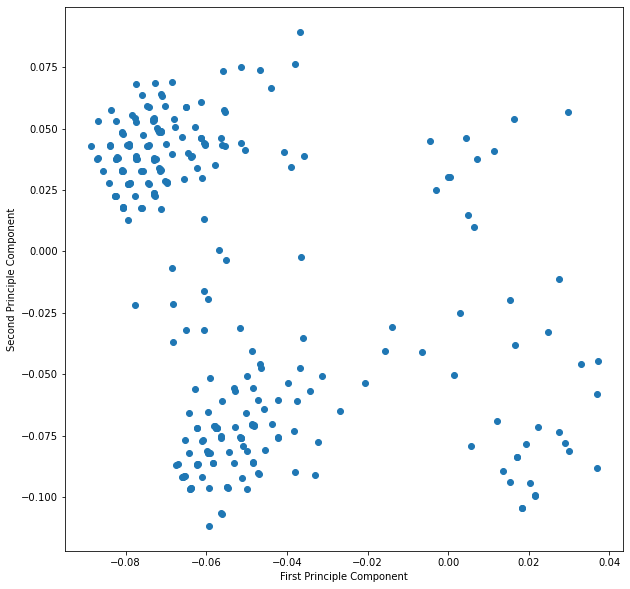

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(pca.components_[0], pca.components_[1])
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

There are many applications of PCA, for example
* Use the components to do a clustering analysis as below. 
* Feed the data into classification. 
* Use it for image recognition with a more efficient data.

You may explore them after this class. 

### Factor Analysis

PCA is one of the Factor Analysis and this section refers to the general case of dimensional reduction. Factor Analysis contains the following steps: 
* Uses PCA or common factor analysis to select a number of (specified) components/ dimensions. 
* Convert factors into uncorrelated factors (factor rotation) until it contains simpler data structure. 

This week we will use factor analysis to generate a wellbeing score. This will be done by `FactorAnalysis()` from scikit-learn. 

In [32]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=1)
fa.fit(X.T)

wellbeing = fa.components_

After that this `wellbeing` is the variable that we look for. You can use it as a target variable for a regression model, or classification. The important thing before doing so, is to do an EDA of it. 

## Clustering

Clustering calculates the distance between data and tries to label them as groups if they deemed to be near enough. There are many algorithms and for example
* k-mean Clustering
* Hierarchical Clustering
* Mean Shift

There are many common algorithms in fact. You can read more of them in [scikit-learn](https://scikit-learn.org/stable/modules/clustering.htm) documentations. 

### k-Means Clustering

k-means Clustering uses user-specified number of clusters and the dataset is calculated with its distance to the randomly defined cluster center. After that, the algorithm will repeat by reassigning the cluster mean to the center of the cluster and recalculate the distances until it is too near to move the centers. 

This time we will use scikit-learn to compute the clustering. This time we use the reduced dataset (instead of the PCA) to possess the clustering. 

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(X)
group = kmeans.fit_predict(X)

The most apparent application is where we can colour the data points in a scatter plot. This will show how clustering works in practice. In this plot, because it is best for eyes to see in two-dimensions. So we will use the PCA components, which is the two dimensions that summarises from the many, in the plot. 

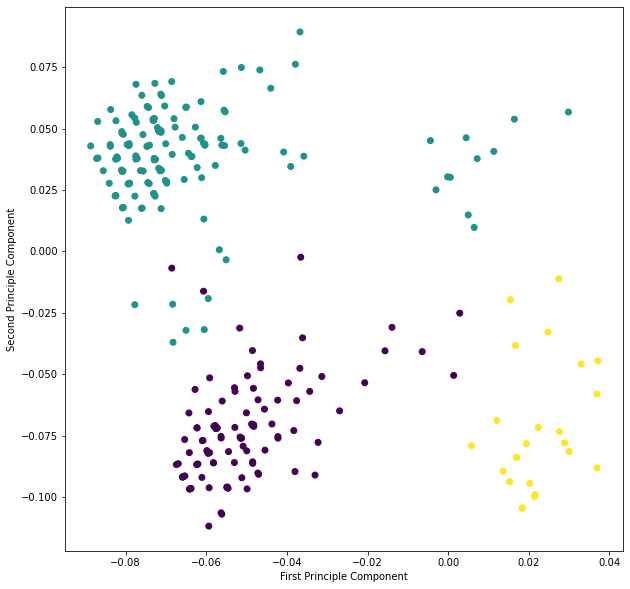

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(pca.components_[0], pca.components_[1], c=group)
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.show()

Because the PCA components are in the order of the data points, so each data point represents a row from the dataset. 

Clustering is said to be difficult to interpret the meaning of the clusters and further investigation is required in each cluster. However, we can bring back the results from clustering into supervied learning, for example
* Use the clustering label as a new factor for classification
* Remove outliers for linear regression. 

You may try them outside the class. 

### Elbow Plot (Optional)

The number of clusters in fact is defined by the user, not seek by the algorithm. So we should find the optimum number of clusters that would not have excessive errors from the model, but also has the least computation time (remember more clusters means more computation) and before it becomes overfitting. We use the __elbow plot__ as a __heuristic__. This is a plot between the sum of standard error within the cluster as a function of the number of clusters. 

The following we use the inertia from our k-means model, which is provided by the calculation above. 

C:\Users\jy191\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


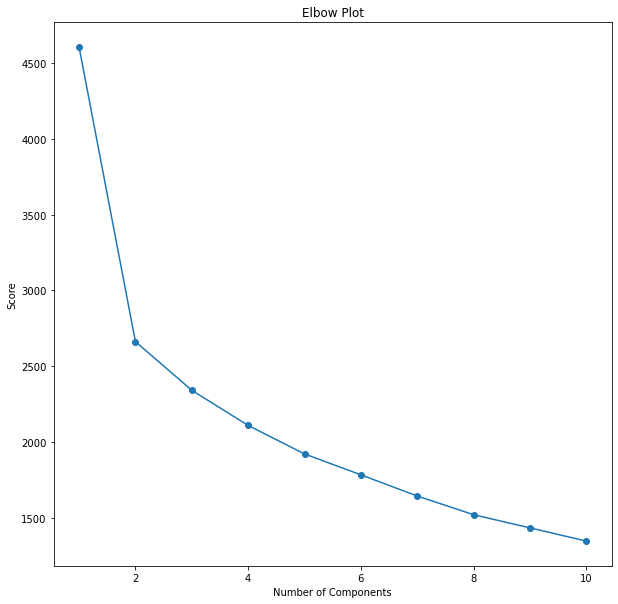

In [67]:
sses = []
n_components = list(range(1, 11))

for k in n_components: 
    kmeans = KMeans(n_clusters=k).fit(X)
    sses.append(kmeans.inertia_)

plt.figure(figsize=(10, 10))
plt.scatter(n_components, sses)
plt.plot(n_components, sses)
plt.title("Elbow Plot")
plt.xlabel("Number of Components")
plt.ylabel("SSE")
plt.show()

We pick the __optimum number of clusters__ as where the line turns a lot from sloping down to slowing down. This is about two clusters ($n\;=\;2$).  

For other clustering algorithms, they do not have the inertia and we should code ourselves to calculate the sum of standard error per cluster and use it in the elbow plot. 

## Application: Topic Modelling using Latent Dirichlet Allocation (LDA)

As a closing of this week, let us apply unsupervised learning into classifying documents by topics. We are using Latent Dirichlet Allocation (LDA) possess topic modelling. The aim of this exercise is to identify what topic is the document or string and compare them with other documents. 

Before we start the exercise, let us introduce the background on LDA. LDA is based on Bayesian statistics where we use a multinomial distribution to represent the probability of occuring different words. The word "Dirichlet" comes from the Dirichlet distribution which is its (conjugate) prior. It controls the probability of the words occurance and has the following parameters: 
* $\alpha$ - The document-topic density. Higher value assumes there are more topics to be classified. 
* $\beta$ (or $\eta$ (`eta`) in this example) - The topic-word density. Higher value assumes the topics are concentrated with particular words. 

So first let us read the sample data. Which contains 9 conversations or paragraphs. 

In [1]:
text_data = ["25 years old, I said. ", 
             "It was a rat's nest. Not a literal one, but that is what her hair seemed to resemble every morning when she got up. It was going to take at least an hour to get it under control and she was sick and tired of it. She peered into the mirror and wondered if it was worth it. It wasn't. She opened the drawer and picked up the hair clippers.", 
             "She sat in the darkened room waiting. It was now a standoff. He had the power to put her in the room, but not the power to make her repent. It wasn't fair and no matter how long she had to endure the darkness, she wouldn't change her attitude. At three years old, Sandy's stubborn personality had already bloomed into full view.", 
             "Pink ponies and purple giraffes roamed the field. Cotton candy grew from the ground as a chocolate river meandered off to the side. What looked like stones in the pasture were actually rock candy. Everything in her dream seemed to be perfect except for the fact that she had no mouth.", 
             "It's not his fault. I know you're going to want to, but you can't blame him. He really has no idea how it happened. I kept trying to come up with excuses I could say to mom that would keep her calm when she found out what happened, but the more I tried, the more I could see none of them would work. He was going to get her wrath and there was nothing I could say to prevent it.", 
             "There was something in the tree. It was difficult to tell from the ground, but Rachael could see movement. She squinted her eyes and peered in the direction of the movement, trying to decipher exactly what she had spied. The more she peered, however, the more she thought it might be a figment of her imagination. Nothing seemed to move until the moment she began to take her eyes off the tree. Then in the corner of her eye, she would see the movement again and begin the process of staring again.",
             "It was going to rain. The weather forecast didn't say that, but the steel plate in his hip did. He had learned over the years to trust his hip over the weatherman. It was going to rain, so he better get outside and prepare. He heard the crack echo in the late afternoon about a mile away. His heart started racing and he bolted into a full sprint. \"It wasn't a gunshot, it wasn't a gunshot,\" he repeated under his breathlessness as he continued to sprint.",
             "She wondered if the note had reached him. She scolded herself for not handing it to him in person. She trusted her friend, but so much could happen. She waited impatiently for word.",
             "Sitting in the sun, away from everyone who had done him harm in the past, he quietly listened to those who roamed by. He felt at peace in the moment, hoping it would last, but knowing the reprieve would soon come to an end. He closed his eyes, the sun beating down on face and he smiled. He smiled for the first time in as long as he could remember."
            ]

In this exercise we will look into natural language processing (NLP). Where this is a technique to analyse the sematics of texts. Normally it involves the following steps: 
1. Tokenisation - Converting words or characters into individual tokens for analysis. 
2. Preprocessing 
    * Stopping word removal
    * Stemming/ Lemmatisation
    * n-grams
3. Generate the bag-of-words/ text-document matrix
4. Train the LDA model

The first thing we should do is to convert the words as token for our analysis. In this exercise we use `nltk` to possess NLP, and they have offered several tokenisers. For example, 
* `word_tokenize()` splits the string into words. 
* `sent_tokenize` splits the sentence into words. 
* `RegexpTokenizer` splits the sentence into words using [regex](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Guide/Regular_Expressions/Cheatsheet).

In this tutorial we use the latter one to tokenise the strings. 

In [ ]:
'''Run me
'''
# Tokenise the documents.
from nltk.tokenize import RegexpTokenizer

docs = []

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(text_data)):
    text_data[idx] = text_data[idx].lower()  # Convert to lowercase.
    docs.append(tokenizer.tokenize(text_data[idx]))  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[x for x in token if not x.isnumeric()] for token in docs]

From above we spend the first few rows to tokenise the strings and store them to a new list called `docs`. This list is a nested list which contains all the words within the sentences. After that we try to clean the list by removing the numbers. 

__Exercise:__ Does `.isnumeric()` returns `True` if the string contains both alphabetic characters and numbers?

__Solution:__ No. But you might want to use a loop to search numbers within the tokens for this. 

__Exercise:__ Write a code so that the tokenised list has no words with one character (or less). 

In [ ]:
# Remove words that are only one character.
docs = [[x for x in token if len(x) > 1] for token in docs]

In [ ]:
# Your code below
docs = 

We have made our first (or second if you have done the exercise) attempt on cleaning the data. Now let us move on to pre-processing and clean the data further. Firstly let us proceed with lemmatise. This is a process to group the words with similar meanings or form (e.g. "playing" or "played" or "plays" are stemmed to "play"). 

There is another NLP task called stemming which is similar, except lemmatisation identifies which part of speech the word is used to decide if the words should be grouped. 

The following is the code to lemmatise the tokenised strings. 

In [ ]:
'''Run me
'''
'''
If seen: 

    LookupError: 
    **********************************************************************
      Resource wordnet not found.
      Please use the NLTK Downloader to obtain the resource:

      >>> import nltk
      >>> nltk.download('wordnet')
Then use the snippet to download the wordnet. 

'''
# import nltk
# nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

In `nltk` there the lemmatiser requires a package `wordnet`. If you see the following: 
```bash
LookupError: 
    **********************************************************************
      Resource wordnet not found.
      Please use the NLTK Downloader to obtain the resource:

      >>> import nltk
      >>> nltk.download('wordnet')
```
Then simply use the code specified above to run your code. It is commented in the code snippet above. 

The other one you might want to pre-process the data is to remove the stopping words. Remember from week 7 that these are the words that does not convey significant meanings. In `ntlk` they have provided a set of stopping words in english if you call
```python
stop_words = set(stopwords.words('english'))
```

__Exercise:__ Remove the stopping words from `docs`. 

If you see: 
```bash
LookupError: 
    **********************************************************************
      Resource stopwords not found.
      Please use the NLTK Downloader to obtain the resource:

      >>> import nltk
      >>> nltk.download('stopwords')
```
Then you might want to uncomment the code from below. Do a search on how it could be done, or you can try yourself first. 

In [ ]:
'''
If seen: 
    LookupError: 
    **********************************************************************
      Resource stopwords not found.
      Please use the NLTK Downloader to obtain the resource:

      >>> import nltk
      >>> nltk.download('stopwords')
Then use the snippet to download the stopwords library. 
'''
# import nltk
# nltk.download('stopwords')
# Remove stopping words
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
docs = [[x for x in token if x not in stop_words] for token in docs]

In [ ]:
# import nltk
# nltk.download('stopwords')

# Your code below
from nltk.corpus import stopwords

stop_words = ???
docs = 

The other pre-processing task is to find n-grams or bigrams. These are the phrases with more than one word. For example, phrases with 2 words are bigrams. In `nltk` we can find the bigrams using `Phrases()` function. 

__Exercise:__ Find the bigrams from `docs`. 

In [ ]:
# Code from https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html (Accessed 11 July 2021)
# Compute bigrams.
from gensim.models import Phrases

bigram = Phrases(docs)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token: # Token is a bigram, add to document. 
            docs[idx].append(token)

In [ ]:
# Your code below


Now we have pre-processed the strings, we can start training the model. In this exercise we use `gensim` to possess topic modelling. It provide a function `LdaModel()` to proceed with the analysis. Before training the model, we will need to convert the words into quantitative variables. This is done by `Dictionary()` in `gensim`. 

In [ ]:
'''Run me
'''
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)

In reality you may need to analyse a large amount of documents. Words that rarely appeared in the set of strings or too much are outliers and it affects what we predict. So we need to filter out words that occur outside a range of documents. For example, to filter our words appeared in less than 20 documents, or more than 50% of the documents we can write.
```python
dictionary.filter_extremes(no_below=20, no_above=0.75)
```
In this exercise we don't have do that as there are too little strings in `docs`. 

We now do the same thing as in last week to generate the bag-of-words representation. Or the term term-document matrix as from last week: 

In [ ]:
'''Run me
'''
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

Finally we can train our LDA model. In `gensim` there is a `LdaModel()` function. 
* `num_topics` - Number of topics, you will need to think how many topics the strings might appear. It could be an educated guess. 
* `chunksize` - Controls how many documents are processed at a time in the training algorithm. The higher the value the faster it is proceeded. 
* `corpus` the bag-of-words representation we wanted to feed in. If you want to use TF-IDF then you can add the following line after you have created `corpus` above: 
    ```python
    import gensim.models
    tfidf = models.TfidfModel(mm)
    ```
    Then use `tfidf` for your `corpus` option in `LdaModel()` below. 

In [ ]:
'''Run me
'''
# Code from https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html (Accessed 11 July 2021)
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

We now have classified the strings into topics. Note that we now have created 5 groups/ clusters, there are further work to find out what do each group mean. There are many ways to represent the results. The following are two of the ways to represent them. 
* `.show_topics()` represents the topics as a list of probability-word pair equations. It shows what words are in the (grouped) topics and how likely does the word appear in the topic. 
* `top_topics()` shows what are the words that most belonged to that group, which is shown by a cohesion score. 

These are shown below. 

In [ ]:
'''Run me
'''
model.show_topics()

In [ ]:
'''Run me
'''
top_topics = model.top_topics(corpus)
top_topics

There are also visual ways to present the results from our model. `pyLDAvis` is a package that we can visually present the results from the LDA model. You can also present the topics with word cloud. 

Note that this does not mean the end of the analysis. You may see that the topics have a lot of overlapping words. This may indicate to tune the number of topics, or other hyperparameters from `LdaModel()`. 

## Conclusion

In this week we have learnt about:
* Conduct dimensional reduction tasks. 
* Conduct clustering tasks. 
* Optimise the clustering task by tuning the number of clusters. 
* Understand the application of clustering and how it assists supervised learning tasks. 
* Cluster texts using Latent Dirichlet Allocation. 